Import Libraries

In [63]:
import pandas as pd
import numpy as np
%matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
import plotly 
import plotly.express as px
import plotly.graph_objects as go
import pycaret as regression
from scipy import stats
#import numpy
#import matplotlib.pyplot as plt





Loading Covid-19 Dataset 

In [4]:
data_world = pd.read_csv('worldometer_data.csv')  
data_country = pd.read_csv('country_wise_latest.csv') 
data_days = pd.read_csv('day_wise.csv')
data_complete = pd.read_csv('covid_19_clean_complete.csv')
data_full_grouped = pd.read_csv('full_grouped.csv')

Let's see what data is provided

In [5]:
# This data shows the number of cases each day
data_days.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [6]:
data_world.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [7]:
data_country.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [8]:
data_country.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [9]:
data_complete.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [10]:
data_full_grouped.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


Let's check if there are any missing values?

In [11]:

data_days.isna().sum()

Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64

Now let's look, if all columns are integer

In [12]:
# So Date, Deaths / 100 Cases, Recovered / 100 Cases, Deaths / 100 Recovered are not integer
data_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


 Some info about each column data

In [13]:

data_days.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
count,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064
std,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,1.579541,16.206159,22.568307,65.175979
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000
25%,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,3.510000,22.785000,9.650000,101.250000
50%,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,4.850000,35.680000,15.380000,184.000000
75%,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,6.297500,48.945000,25.342500,187.000000
max,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06,282756.000000,9966.000000,284394.000000,7.180000,57.450000,134.430000,187.000000



Let's see which countries had the most active cases

In [14]:
active_case_countries = data_country[['Country/Region','Active']].sort_values(by=['Active'],ascending=False).head(10)
active_case_countries 

,Country/Region,Active
173,US,2816444
23,Brazil,508116
79,India,495499
177,United Kingdom,254427
138,Russia,201097
154,South Africa,170537
37,Colombia,117163
61,France,108928
32,Canada,107514
132,Peru,98752


In [15]:

fig_bar = px.bar(active_case_countries, x= 'Active', y= 'Country/Region', color= 'Country/Region', title='Top 10 Most Active Cases In Countries')
fig_bar.show()

Let's see which countries had the most death cases

In [16]:
death_case_countries = data_country[['Country/Region','Deaths']].sort_values(by=['Deaths'],ascending=False).head(10)
death_case_countries, active_case_countries
 

(     Country/Region  Deaths
 173              US  148011
 23           Brazil   87618
 177  United Kingdom   45844
 111          Mexico   44022
 85            Italy   35112
 79            India   33408
 61           France   30212
 157           Spain   28432
 132            Peru   18418
 81             Iran   15912,
      Country/Region   Active
 173              US  2816444
 23           Brazil   508116
 79            India   495499
 177  United Kingdom   254427
 138          Russia   201097
 154    South Africa   170537
 37         Colombia   117163
 61           France   108928
 32           Canada   107514
 132            Peru    98752)

In [17]:
fig_bar_d = px.bar(death_case_countries, x= 'Deaths', y= 'Country/Region', color= 'Country/Region', title='Top 10 Most Deaths From Covid In Countries')
fig_bar_d.show()

In the United Kingdom, the number of deaths is quite high compared to active cases

Let's see which countries had the most recovered cases

In [18]:

recovered_case_countries = data_country[['Country/Region','Recovered']].sort_values(by=['Recovered'],ascending=False).head(10)
recovered_case_countries

,Country/Region,Recovered
23,Brazil,1846641
173,US,1325804
79,India,951166
138,Russia,602249
35,Chile,319954
111,Mexico,303810
154,South Africa,274925
132,Peru,272547
81,Iran,255144
128,Pakistan,241026


In [19]:
fig_bar_r = px.bar(recovered_case_countries, x= 'Recovered', y= 'Country/Region', color= 'Country/Region', title='Top 10 Most Recovered Cases In Countries')
fig_bar_r.show()

Brazil has the highest revovery rate

Let's check is there all 6 regions in WHO data

In [20]:
who_region = data_country['WHO Region'].unique()
who_region

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

How many countries make up each region?

In [21]:
who_region = data_country.groupby(['WHO Region'])[['Country/Region']].count()
who_region.set_axis(['Total Countries'], axis='columns',inplace=True)
who_region.sort_values(['Total Countries'], ascending=False)

,Total Countries
WHO Region,
Europe,56
Africa,48
Americas,35
Eastern Mediterranean,22
Western Pacific,16
South-East Asia,10



let's represent the data graphically

In [22]:
fig_bar_w = px.pie(who_region, values ='Total Countries', names = who_region.index, title='Countries in WHO region', hole=0.4)
fig_bar_w.show()



Let's look at each region Active, Deaths and Recovered cases

In [23]:
who_region_active = data_country.groupby(['WHO Region'])[['Active','Deaths','Recovered']].sum()
who_region_active.sort_values(['Active'], ascending=False, inplace=True)
who_region_active

,Active,Deaths,Recovered
WHO Region,,,
Americas,4027938,342732,4468616
Europe,1094656,211144,1993723
South-East Asia,637015,41349,1156933
Africa,270339,12223,440645
Eastern Mediterranean,251005,38339,1201400
Western Pacific,77409,8249,206770


Here's what it looks like with a bar chart

In [24]:
anchos = [0.25] * 10 
fig = go.Figure()
fig.add_trace(go.Bar(x = who_region_active.index,
                     y = who_region_active['Recovered'], 
                     width = anchos, name = 'Recovered Case'))
fig.add_trace(go.Bar(x = who_region_active.index,
                     y = who_region_active['Active'], 
                     width = anchos, name = 'Active Case'))
fig.add_trace(go.Bar(x = who_region_active.index,
                     y = who_region_active['Deaths'], 
                     width = anchos, name = 'Death Case'))


fig.update_layout(title =  "WHO Regions Stats",
                  barmode = 'group', title_font_size = 40)
fig.update_xaxes(title_text = 'WHO Regions')
fig.update_yaxes(title_text = "No. of cases")
fig.show()

How the number of 'New cases', 'New deaths' and 'New recovery'  changeds each month

In [25]:
data_days.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

First need to change Date data type and add columns with day and month

In [26]:
data_days['Date']=pd.to_datetime(data_days['Date'])
data_days['Year']=data_days['Date'].dt.year
data_days['Month']=data_days['Date'].dt.month
data_days['Day']=data_days['Date'].dt.day


In [27]:
data_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    188 non-null    datetime64[ns]
 1   Confirmed               188 non-null    int64         
 2   Deaths                  188 non-null    int64         
 3   Recovered               188 non-null    int64         
 4   Active                  188 non-null    int64         
 5   New cases               188 non-null    int64         
 6   New deaths              188 non-null    int64         
 7   New recovered           188 non-null    int64         
 8   Deaths / 100 Cases      188 non-null    float64       
 9   Recovered / 100 Cases   188 non-null    float64       
 10  Deaths / 100 Recovered  188 non-null    float64       
 11  No. of countries        188 non-null    int64         
 12  Year                    188 non-null    int64     

In [28]:
casesInMonths = data_days.groupby(['Month'])[['New cases','New deaths','New recovered']].sum()
casesInMonths.set_axis(['Active', 'Deaths', 'Recovered'],axis = 'columns',inplace=True)
casesInMonths = casesInMonths.sort_values('Active',ascending=False)
casesInMonths

,Active,Deaths,Recovered
Month,,,
7,6030911,142826,4186628
6,4265801,137604,2695870
5,2921042,138902,1595973
4,2412383,190226,815542
3,786064,41542,135760
2,75379,2723,38095
1,9372,196,191


In [29]:
anchos = [0.2] * 6
fig = go.Figure()
fig.add_trace(go.Bar(x = casesInMonths.index,
                     y = casesInMonths['Recovered'], 
                     width = anchos, name = 'Recovered Case'))
fig.add_trace(go.Bar(x = casesInMonths.index,
                     y = casesInMonths['Active'], 
                     width = anchos, name = 'Active Case'))
fig.add_trace(go.Bar(x = casesInMonths.index,
                     y = casesInMonths['Deaths'], 
                     width = anchos, name = 'Death Case'))


fig.update_layout(title =  "Covid Cases Stats per Month of 2020",
                  barmode = 'group', title_font_size = 30)
fig.update_xaxes(title_text = 'Months')
fig.update_yaxes(title_text = "No. of cases")

fig.show()


The data show that the virus is spreading at a high rate

In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_days['Date'], y=data_days['Active'],
                    mode='lines', 
#                     text=casesInMonths_df['Active'],
                    name='Active'))
fig.add_trace(go.Scatter(x=data_days['Date'], y=data_days['Deaths'],
                    mode='lines',
#                     text=casesInMonths_df['Deaths'],
                    name='Deaths'))
fig.add_trace(go.Scatter(x=data_days['Date'], y=data_days['Recovered'],
                    mode='lines',
#                     text=casesInMonths_df['Recovered'],
                    name='Recovered'))
fig.update_layout(title =  "Covid Cases Stats of 2020",
                  barmode = 'group', title_font_size = 30)
fig.update_xaxes(title_text = 'Date')
fig.update_yaxes(title_text = "No. of cases")

fig.show()


the graph shows that the number of 'Recovered' cases exceeded the number of 'Active' cases in June


Let's check how looks evolution of Covid in Lithuania:

In [31]:

lt = data_complete[data_complete['Country/Region']== 'Lithuania'][['Date','Recovered','Deaths','Active']]
lt.set_index('Date',inplace = True)

In [32]:
lt

,Recovered,Deaths,Active
Date,,,
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0
...,...,...,...
2020-07-23,1611,80,269
2020-07-24,1616,80,290
2020-07-25,1616,80,305


In [33]:
data_complete['Date'] = pd.to_datetime(data_complete['Date'])
#data_day.info()
data_complete['Month'] = data_complete['Date'].dt.month
data_complete['Day'] = data_complete['Date'].dt.day
data_complete['Month']

0        1
1        1
2        1
3        1
4        1
        ..
49063    7
49064    7
49065    7
49066    7
49067    7
Name: Month, Length: 49068, dtype: int64

In [34]:
lt = data_complete[data_complete['Country/Region']== 'Lithuania'][['Date','Recovered','Deaths','Active']]
lt.set_index('Date',inplace = True)

In [35]:
lt.resample('M')

<AxesSubplot: xlabel='Date'>

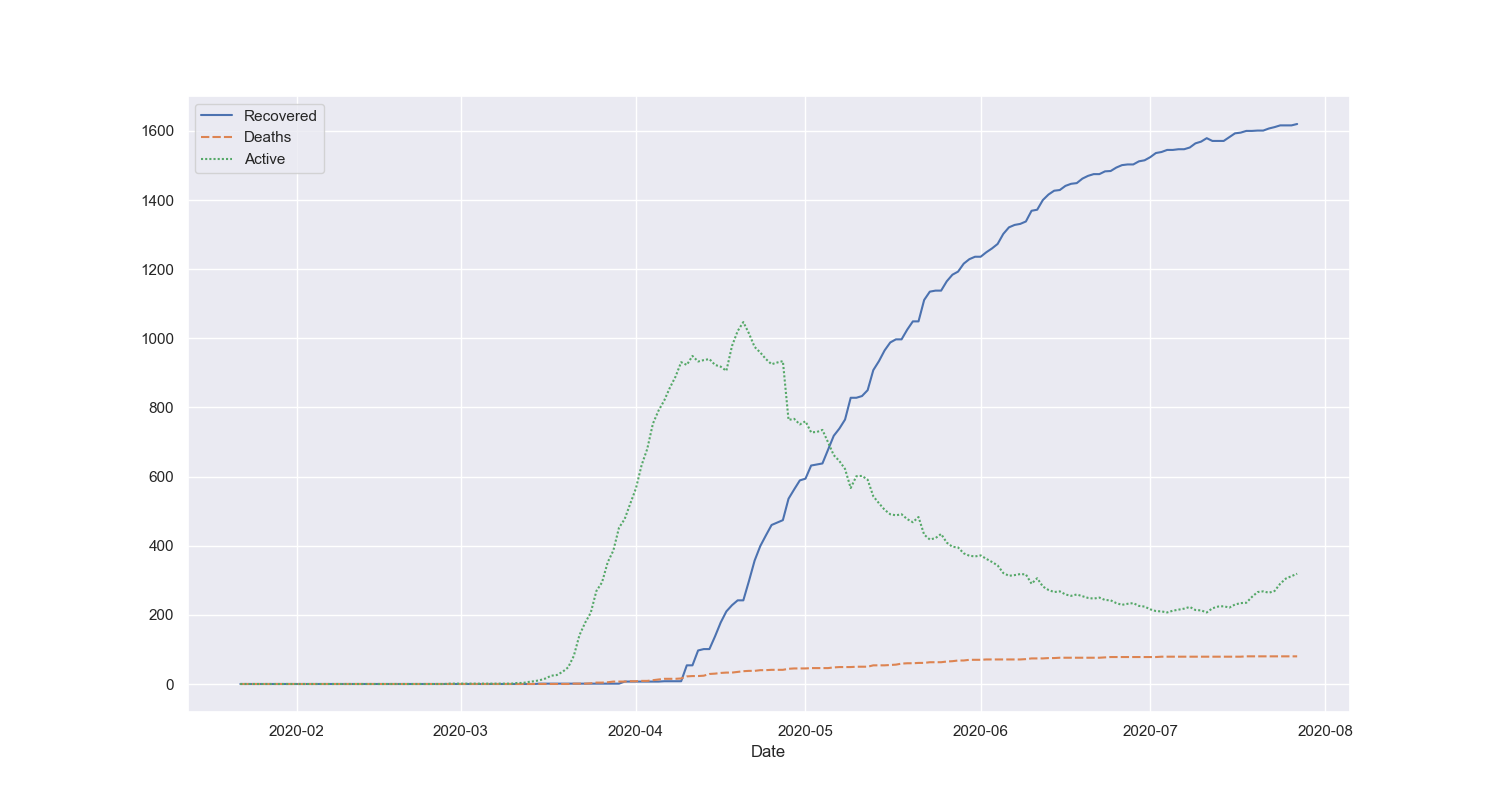

In [36]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data = lt)

the graph shows that the number of 'Recovered' cases exceeded the number of 'Active' cases in May. So it 1 month earlier then average 

World's map with 'Confirmed' cases

In [37]:
wc = data_complete[data_complete['Date']==data_complete['Date'].max()]

In [38]:
wm = wc.groupby('Country/Region')['Active','Confirmed','Deaths','Recovered'].sum().reset_index()
wm.head()

,Country/Region,Active,Confirmed,Deaths,Recovered
0,Afghanistan,9796,36263,1269,25198
1,Albania,1991,4880,144,2745
2,Algeria,7973,27973,1163,18837
3,Andorra,52,907,52,803
4,Angola,667,950,41,242


In [39]:
fig = px.choropleth(data_complete, locations ='Country/Region', 
                    locationmode = 'country names',color = 'Confirmed',
                    #range_color = [1,10000], 
                    animation_frame=data_complete['Date'].dt.strftime('%Y-%m-%d'),
                   )
fig.update_layout(title ="Confirmed Records Across The World")
fig.show()


Let's check if there is a correlation between the data?

In [40]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
#data_day = data_day.drop(['Date'], axis = 'columns')
corr = data_days.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(1)

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,Year,Month,Day
Confirmed,1.0,1.0,1.0,1.0,1.0,0.6,0.9,0.2,0.7,-0.4,0.6,nan,0.9,0.0
Deaths,1.0,1.0,0.9,1.0,1.0,0.6,0.9,0.4,0.7,-0.4,0.7,nan,1.0,0.0
Recovered,1.0,0.9,1.0,1.0,0.9,0.5,0.9,0.1,0.7,-0.4,0.5,nan,0.9,0.0
Active,1.0,1.0,1.0,1.0,1.0,0.6,0.9,0.4,0.7,-0.4,0.7,nan,1.0,0.0
New cases,1.0,1.0,0.9,1.0,1.0,0.7,0.9,0.4,0.7,-0.4,0.7,nan,0.9,0.0
New deaths,0.6,0.6,0.5,0.6,0.7,1.0,0.6,0.8,0.3,-0.3,0.8,nan,0.7,-0.0
New recovered,0.9,0.9,0.9,0.9,0.9,0.6,1.0,0.2,0.7,-0.4,0.6,nan,0.9,0.0
Deaths / 100 Cases,0.2,0.4,0.1,0.4,0.4,0.8,0.2,1.0,0.2,-0.3,0.8,nan,0.5,-0.0
Recovered / 100 Cases,0.7,0.7,0.7,0.7,0.7,0.3,0.7,0.2,1.0,-0.8,0.6,nan,0.8,-0.1
Deaths / 100 Recovered,-0.4,-0.4,-0.4,-0.4,-0.4,-0.3,-0.4,-0.3,-0.8,1.0,-0.5,nan,-0.5,0.1


Correlation between 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases' is equal 1, because data is derivative. But it seems that 'New deaths' data can be used with predict model


Let's try to clear the data for the mode

In [41]:
df = data_days
df

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,Year,Month,Day
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6,2020,1,22
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8,2020,1,23
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9,2020,1,24
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11,2020,1,25
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13,2020,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187,2020,7,23
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187,2020,7,24
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187,2020,7,25
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187,2020,7,26


In [42]:
#df['Date']=pd.to_datetime(df['Date'])
#df['year']=df['Date'].dt.year
#df['month']=df['Date'].dt.month
#df['day']=df['Date'].dt.day
#df['quarter']=df['Date'].dt.quarter
#df['dow']=df['Date'].dt.dayofweek


Features selection

In [43]:
qq = df.drop(['Deaths / 100 Cases','Recovered / 100 Cases','Deaths / 100 Recovered','No. of countries','Date','Year','Day','Confirmed','Deaths','Recovered','New recovered'], axis = 1)
qq

,Active,New cases,New deaths,Month
0,510,0,0,1
1,606,99,1,1
2,879,287,8,1
3,1353,493,16,1
4,2010,684,14,1
...,...,...,...,...
183,6166006,282756,9966,7
184,6212290,281164,6144,7
185,6243930,255545,4867,7
186,6309711,204606,4104,7


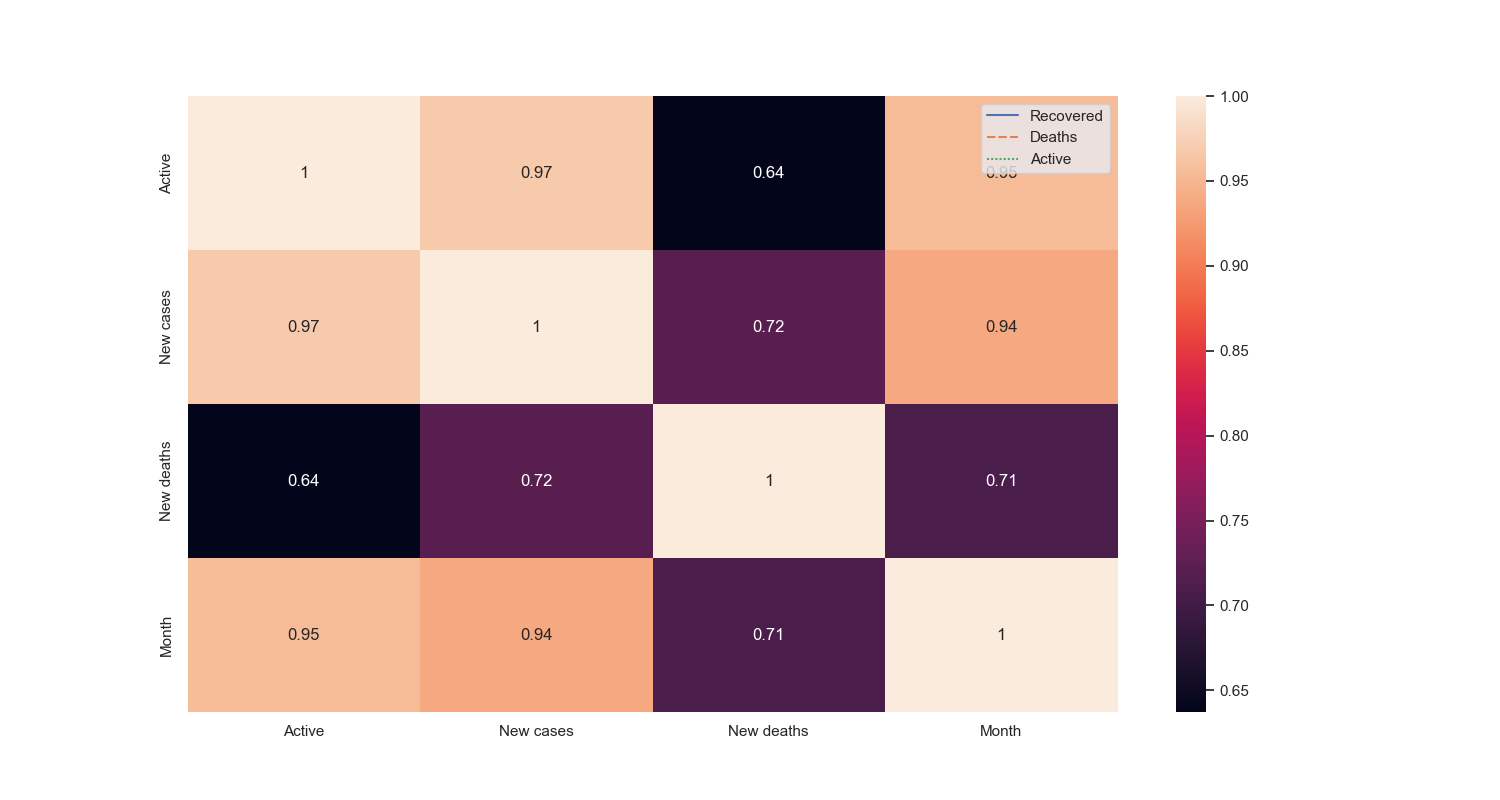

In [44]:

sns.heatmap(qq.corr(), annot=True)
plt.show()

So for 'New deaths' prediction i choose 'Active' and 'New cases' features.

In [45]:

features_r = ['Active','New cases','Month']
label_r = ['New deaths']
q = qq[features_r].values
w = qq[label_r]
q

array([[    510,       0,       1],
       [    606,      99,       1],
       [    879,     287,       1],
       [   1353,     493,       1],
       [   2010,     684,       1],
       [   2784,     809,       1],
       [   5340,    2651,       1],
       [   5908,     588,       1],
       [   7922,    2068,       1],
       [   9495,    1693,       1],
       [  11498,    2111,       2],
       [  15966,    4749,       2],
       [  18857,    3100,       2],
       [  22585,    4011,       2],
       [  26008,    3745,       2],
       [  28750,    3159,       2],
       [  31712,    3532,       2],
       [  33792,    2734,       2],
       [  36132,    3027,       2],
       [  37906,    2538,       2],
       [  39145,    2042,       2],
       [  40594,    1886,       2],
       [  52905,   13645,       2],
       [  57554,    6484,       2],
       [  58197,    2075,       2],
       [  58790,    2114,       2],
       [  58996,    1936,       2],
       [  58908,    1794,   


I will use data without May to train the model and test the model with May data

In [46]:
len(df['Month'].unique())
df['Month'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [47]:
#Train set:
df_train = qq[~(qq['Month']==5)]

In [48]:
#Test set
df_test = qq[qq['Month']==5]

In [49]:
#df_train.drop('month', axis=1, inplace=True)
#df_train.drop('Date', axis=1, inplace=True)
#df_test.drop('month', axis=1, inplace=True)
#df_test.drop('Date', axis=1, inplace=True)

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 187
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Active      157 non-null    int64
 1   New cases   157 non-null    int64
 2   New deaths  157 non-null    int64
 3   Month       157 non-null    int64
dtypes: int64(4)
memory usage: 6.1 KB


Let's try draw the line linear regression with data

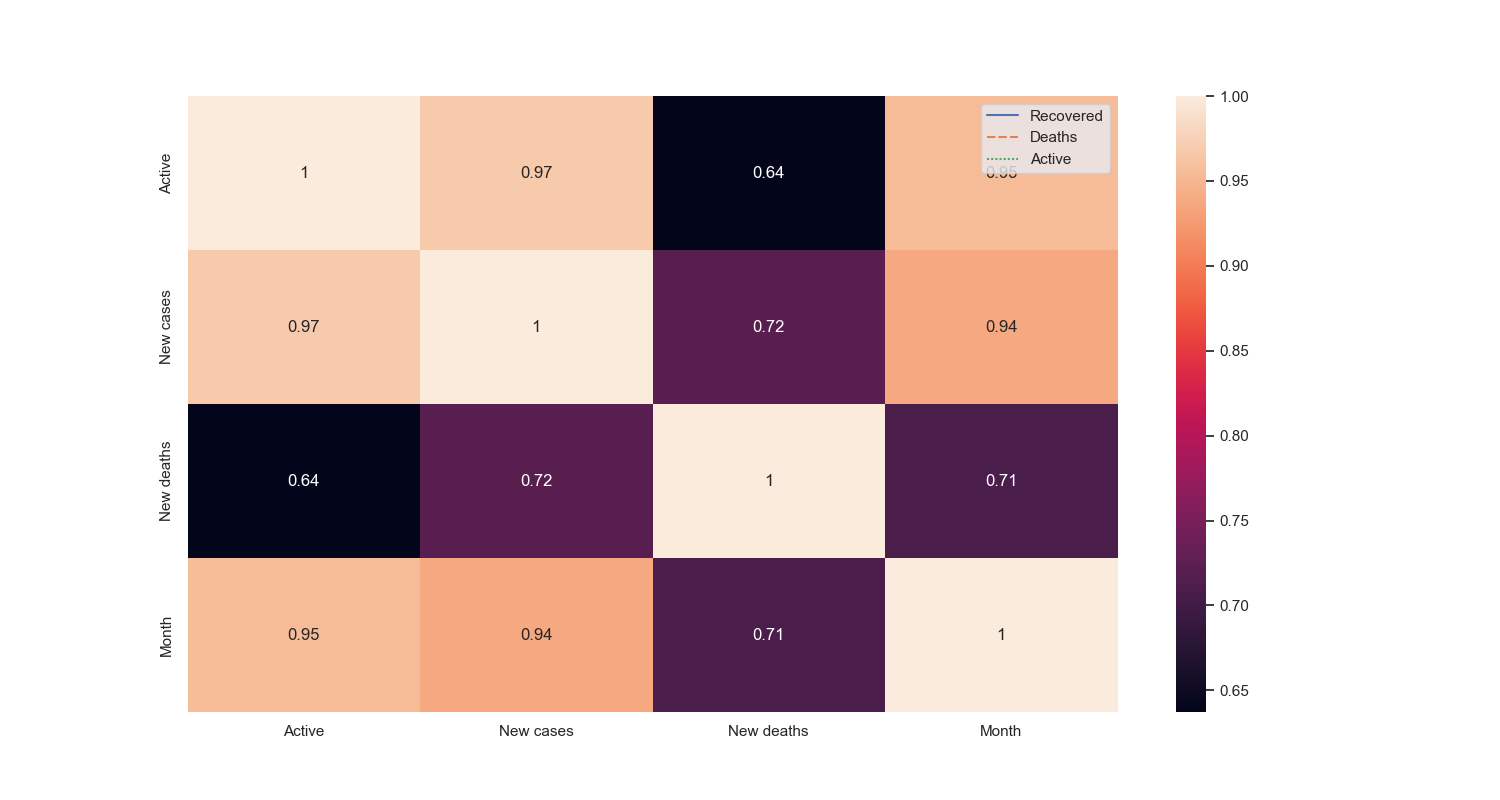

0.6460662767680628


In [51]:

x = df_train['Active']
y = df_train['New deaths']

slope, intercept, r, p,std_err = stats.linregress(x,y)

def myfunc(x):
    return slope *x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
print(r)

Rezult not good :) 
let's try polynomial regression

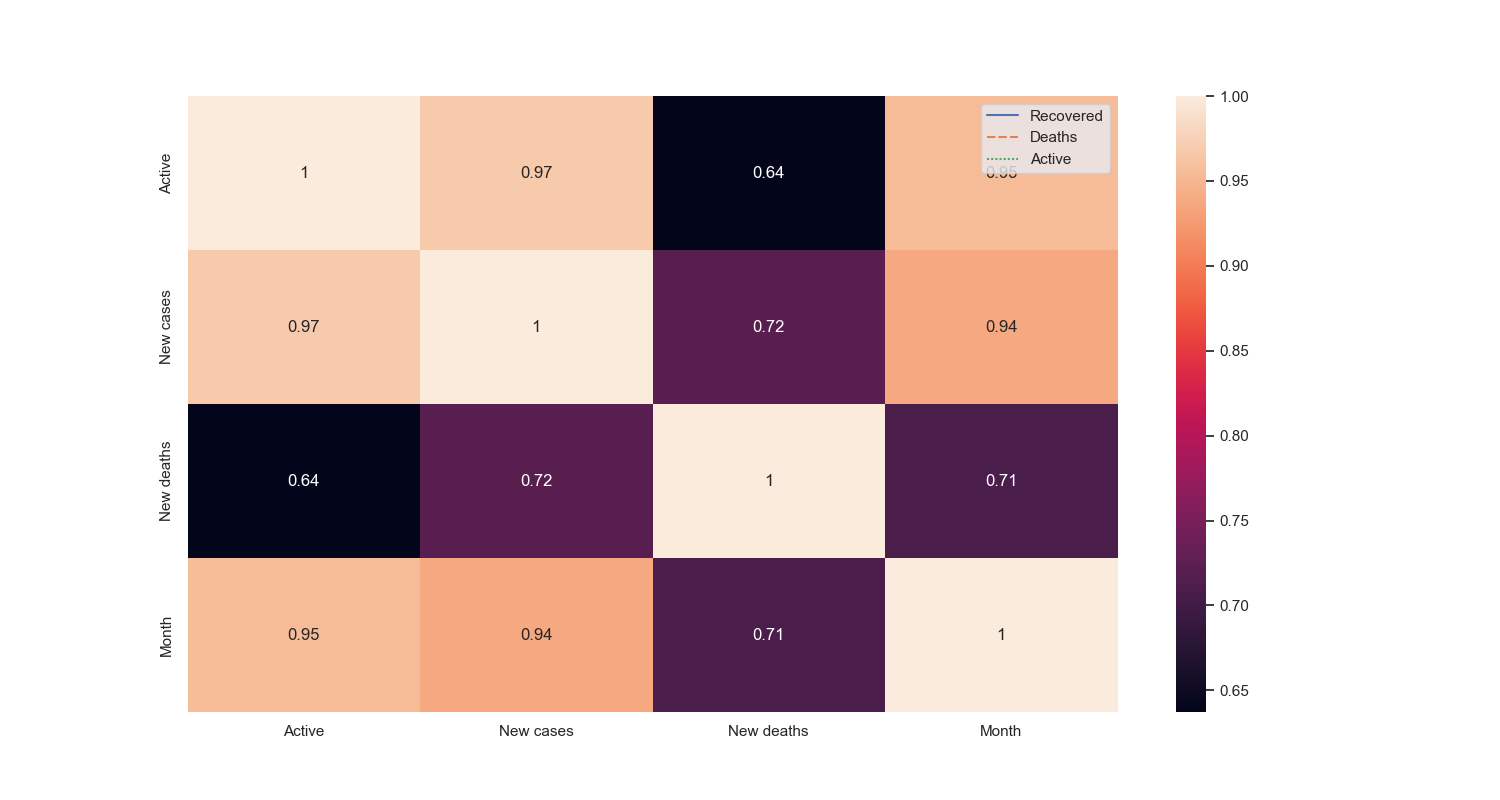

In [52]:
import numpy
import matplotlib.pyplot as plt

x = df_train['Active']
y = df_train['New deaths']

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1000, 6400000, num = 448)
speed = mymodel(17)
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()



In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pycaret.regression import *
model_setup = setup(data=df_train, target='New deaths')

,Description,Value
0,session_id,2529
1,Target,New deaths
2,Original Data,"(157, 4)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(109, 8)"


In [54]:
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,532.8836,578393.8166,710.1623,0.9167,0.7665,0.9247,0.0060
lasso,Lasso Regression,526.2491,579283.8063,712.1230,0.9160,0.6698,0.7780,0.5290
ridge,Ridge Regression,540.5790,579277.6772,720.9367,0.9153,1.0068,1.5942,0.0060
lr,Linear Regression,556.7649,605749.4531,746.8141,0.9102,0.9791,7.9853,0.5740
lar,Least Angle Regression,548.4742,668551.4203,748.2096,0.9080,0.8809,1.2575,0.0050
rf,Random Forest Regressor,495.7473,693620.6051,743.2098,0.9071,0.5120,0.7716,0.0500
et,Extra Trees Regressor,501.1329,740450.1296,765.7909,0.9017,0.5232,0.6940,0.0450
lightgbm,Light Gradient Boosting Machine,520.5448,753474.7125,778.4538,0.8983,0.7747,0.7955,0.0130
ada,AdaBoost Regressor,552.3323,778813.9653,809.5943,0.8926,0.6912,1.1032,0.0100
gbr,Gradient Boosting Regressor,546.9069,829968.1524,809.9034,0.8841,0.5836,0.8938,0.0080


In [55]:
ridge_model = create_model('ridge')
lr_model = create_model('lr')
lasso_model = create_model('lasso')
rf_model = create_model('rf')
et_model = create_model('et')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,475.9918,498308.4584,705.9097,0.9412,0.7986,1.3565
1,910.4036,1464786.8732,1210.2838,0.8287,0.3893,0.2988
2,317.2973,264796.7744,514.5841,0.9584,0.2191,0.1349
3,289.9645,199261.6122,446.3873,0.9580,0.6889,0.1458
4,199.8473,87002.1893,294.9613,0.9886,0.2773,0.1396
5,805.1009,1077048.6744,1037.8096,0.7709,0.6627,0.2306
6,852.9109,2662165.6282,1631.6144,0.7338,0.3332,0.2419
7,361.1782,259476.9832,509.3888,0.9639,1.0289,3.0778
8,288.5909,266698.1796,516.4283,0.9551,0.6750,1.1833


In [56]:
# Finaliszing model for predictions 
model = finalize_model('rf')
predictions = predict_model(model, data = df_test)
predictions.tail(30)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1093.9810,1784213.2740,1335.7445,-0.5344,0.3464,0.2702


,Active,New cases,New deaths,Month,Label
101,2126040,81853,5325,5,3757.37
102,2169008,77636,3453,5,3818.28
103,2208008,76078,4128,5,3818.28
104,2246497,79989,5871,5,3807.32
105,2285111,90022,6669,5,3568.48
106,2330371,90669,5409,5,3568.48
107,2380782,92997,5568,5,3568.48
108,2409845,85846,4265,5,3579.95
109,2449784,76255,3566,5,3818.28
110,2476456,76298,3473,5,3818.28


The rf model shows the best result. But still, maybe rezult could be better?

In [57]:
tuned_rf = tune_model(rf_model, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,469.7982,439520.3773,662.9633,0.9482,0.8153,1.4049
1,990.6888,1639002.6400,1280.2354,0.8083,0.4246,0.3192
2,395.7952,424702.4580,651.6920,0.9332,0.5446,0.5693
3,308.4379,199363.0870,446.5009,0.9580,0.9786,0.1734
4,218.6088,142683.5234,377.7347,0.9813,0.2767,0.2198
5,807.3645,1026747.0771,1013.2853,0.7816,0.3040,0.2085
6,724.0079,2103629.4348,1450.3894,0.7896,0.2917,0.2173
7,214.9858,109265.6985,330.5536,0.9848,1.0205,2.8558
8,455.9218,546408.0875,739.1942,0.9079,1.0866,3.3845


In [58]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [59]:
final_rf = finalize_model(tuned_rf)

In [60]:

unseen_predictions = predict_model(final_rf, data=df_test)
unseen_predictions.head(30)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,969.5346,1298137.1959,1139.3582,-0.1164,0.3077,0.2533


,Active,New cases,New deaths,Month,Label
100,2089540,87046,5177,5,4157.450000
101,2126040,81853,5325,5,4104.580000
102,2169008,77636,3453,5,4104.580000
103,2208008,76078,4128,5,4104.580000
104,2246497,79989,5871,5,4104.580000
105,2285111,90022,6669,5,4157.450000
106,2330371,90669,5409,5,4210.970000
107,2380782,92997,5568,5,4210.970000
108,2409845,85846,4265,5,4157.450000
109,2449784,76255,3566,5,4104.580000



The fitted model predicts better, but the result still not good. This was to be expected, since the correlation coefficient is low, and R2 is also low. Using more features [Confirmed, Recovered, Deaths] would make the result much better. But only because it is derived data, the correlation coefficient between features [Confirmed, Recovered, Deaths] is almost 1

In [61]:
from sklearn import preprocessing
import pandas as pd
names = [['Confirmed','Recovered','Deaths', 'New cases']]
preproces = data_day[['Confirmed','Recovered','Deaths', 'New cases']]
d = preprocessing.normalize(preproces, axis=1)
scaled_df = pd.DataFrame(d, columns = names)
scaled_df.head(50)






NameError: name 'data_day' is not defined